# **Assignment 5 - Train-Test Split**

By 23520011 - Sharaneshwar Punjal 

1. Generate 1000 male heights - mean 166, sd = 5.5
2. Generate 1000 female heights - mean 152, sd = 4.5 
3. Use test train split to set aside random 200 male and random 200 female data points as test set 
4. Use train data set of remaining 800 male and 800 female heights to train Probability based classifier. Calculate classification accuracy on both train and test data points. 
5. Impact of outliers
* Identify top 50 female hights in train data, increase hight of these female samples by 10 cm each 
    1. Observe change in mean and sd of train data after change in heights 
* Train the probability-based classification algorithm on this altered train data 
    1. Estimate the classification accuracy on both the train and test data 
    2. Remove outliers from the train data using z-score method on female data 
    3. Again, train the probability-based classification on the train data after outlier removal and estimate classification accuracy on both test and train data 
    4. Observe the changes in test and train accuracy. 
6. Impact of Trimming 
* Consider the female train data including the 50 outliers for this section 
* For k in range (1:15) 
    1. Trim upper and lower k% of female train data set 
    2. Train probability based on classifier on female trimmed train dataset and male train data set 
    3. Calculate accuracy of classification on both train and test data set 
* Observe impact of trimming on classification accuracy on train and test data sets

In [24]:
import numpy as np
import pandas as pd

np.random.seed(42)
male_heights = np.random.normal(loc=166, scale=5.5, size=1000)
female_heights = np.random.normal(loc=152, scale=4.5, size=1000)

In [25]:
from sklearn.model_selection import train_test_split

male_train, male_test = train_test_split(male_heights, test_size=200, random_state=42)
female_train, female_test = train_test_split(female_heights, test_size=200, random_state=42)

male_mean, male_std = np.mean(male_train), np.std(male_train)
female_mean, female_std = np.mean(female_train), np.std(female_train)

print(female_mean, female_std)

152.38455889547586 4.479383754168807


In [26]:
def gaussian_pdf(height, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((height - mean) / std) ** 2)

def classify(height, male_mean, male_std, female_mean, female_std):
    p_male = gaussian_pdf(height, male_mean, male_std)
    p_female = gaussian_pdf(height, female_mean, female_std)
    return 1 if p_male > p_female else 0

In [28]:
male_train_predictions = np.array([classify(h, male_mean, male_std, female_mean, female_std) for h in male_train])
female_train_predictions = np.array([classify(h, male_mean, male_std, female_mean, female_std) for h in female_train])

male_test_predictions = np.array([classify(h, male_mean, male_std, female_mean, female_std) for h in male_test])
female_test_predictions = np.array([classify(h, male_mean, male_std, female_mean, female_std) for h in female_test])

male_train_accuracy = np.mean(male_train_predictions ==1)
female_train_accuracy = np.mean(female_train_predictions == 0)

male_test_accuracy = np.mean(male_test_predictions ==1)
female_test_accuracy = np.mean(female_test_predictions == 0)

print("Male Train Accuracy:", male_train_accuracy)
print("Female Train Accuracy:", female_train_accuracy)
print("Male Test Accuracy:", male_test_accuracy)
print("Female Test Accuracy:", female_test_accuracy)

train_accuracy = (male_train_accuracy + female_train_accuracy) / 2
test_accuracy = (male_test_accuracy + female_test_accuracy) / 2

print("Overall Train Accuracy:", train_accuracy)
print("Overall Test Accuracy:", test_accuracy)


Male Train Accuracy: 0.91
Female Train Accuracy: 0.925
Male Test Accuracy: 0.905
Female Test Accuracy: 0.94
Overall Train Accuracy: 0.9175
Overall Test Accuracy: 0.9225


The classifier performs well and similarly on both train and test sets. The close overall 
accuracies indicate a stable model with good generalization.

## Impact of Outliers

In [29]:
female_train_sorted = np.sort(female_train)
top_50_females= np.argsort(female_train)[-50:]
female_train[top_50_females] += 10

new_female_mean, new_female_std = np.mean(female_train), np.std(female_train)
print("Updated Female Train Mean:", new_female_mean)
print("Updated Female Train Std Dev:", new_female_std)


Updated Female Train Mean: 153.00955889547586
Updated Female Train Std Dev: 6.080813138614453


In [30]:
female_train_predictions_new = np.array([classify(h, male_mean, male_std, new_female_mean, new_female_std) for h in female_train])

female_test_predictions_new = np.array([classify(h, male_mean, male_std, new_female_mean, new_female_std) for h in female_test])

female_train_accuracy_new = np.mean(female_train_predictions_new == 0)

female_test_accuracy_new = np.mean(female_test_predictions_new == 0)

print("Updated Female Train Accuracy:", female_train_accuracy_new)
print("Updated Female Test Accuracy:", female_test_accuracy_new)


Updated Female Train Accuracy: 0.9375
Updated Female Test Accuracy: 0.96


- Updated female train mean: 152.74114(↑) 
- Updated Female train standard deviation: 6.1444(↑) 
- Updated Female train accuracy: 0.9375(↓) 
- Updated female test accuracy: 0.94(↑) 

Mean and Standard Deviation increases after adding top 50 sample heights by 10. 
Female train accuracy decreases upon adding outliers. However, Female test accuracy increases by adding outliers. 
There is a fall in training accuracy but increase in testing accuracy which shows that the new data (with new mean and sd) is able to understand the training data better.

In [31]:
# Calculate means and standard deviations for male and female train data
male_mean_train = np.mean(male_train)
male_std_train = np.std(male_train)
female_mean_train = np.mean(female_train)
female_std_train = np.std(female_train)

# Calculate Z-scores
male_train_zscores = np.abs((male_train - male_mean_train) / male_std_train)
female_train_zscores = np.abs((female_train - female_mean_train) / female_std_train)

# Filter outliers (Z-score < 3)
male_train_filtered = male_train[male_train_zscores < 3]
female_train_filtered = female_train[female_train_zscores < 3]

# Recalculate means and standard deviations after filtering
male_mean_filtered, male_std_filtered = np.mean(male_train_filtered), np.std(male_train_filtered)
female_mean_filtered, female_std_filtered = np.mean(female_train_filtered), np.std(female_train_filtered)

# Classify filtered
female_train_predictions_filtered = np.array([classify(h, male_mean_filtered, male_std_filtered, female_mean_filtered, female_std_filtered) for h in female_train_filtered])

female_test_predictions_filtered = np.array([classify(h, male_mean_filtered, male_std_filtered, female_mean_filtered, female_std_filtered) for h in female_test])

# Accuracy for female train and test data after filtering
female_train_accuracy_filtered = np.mean(female_train_predictions_filtered == np.zeros(len(female_train_filtered)))
female_test_accuracy_filtered = np.mean(female_test_predictions_filtered == np.zeros(200))

print("Filtered Female Train Accuracy:", female_train_accuracy_filtered)
print("Filtered Female Test Accuracy:", female_test_accuracy_filtered)

Filtered Female Train Accuracy: 0.9587628865979382
Filtered Female Test Accuracy: 0.94


- The training accuracy is higher than the original data also after removing outliers.
- However, there is a fall in testing accuracy. This must be happening as the variablility is cleared from training data, but the testing data still has some variable data leading to more misclassifications than the training data.
- It is a sign of overfitting. The model is not able to generalize well on the testing data.

## Impact of Trimming

Trim 1%: Train Accuracy = 0.9464, Test Accuracy = 0.9300
Trim 2%: Train Accuracy = 0.9557, Test Accuracy = 0.9250
Trim 3%: Train Accuracy = 0.9654, Test Accuracy = 0.9250
Trim 4%: Train Accuracy = 0.9701, Test Accuracy = 0.9200
Trim 5%: Train Accuracy = 0.9708, Test Accuracy = 0.9050
Trim 6%: Train Accuracy = 0.9631, Test Accuracy = 0.8950
Trim 7%: Train Accuracy = 0.9637, Test Accuracy = 0.8900
Trim 8%: Train Accuracy = 0.9717, Test Accuracy = 0.8900
Trim 9%: Train Accuracy = 0.9741, Test Accuracy = 0.8900
Trim 10%: Train Accuracy = 0.9844, Test Accuracy = 0.8900
Trim 11%: Train Accuracy = 0.9920, Test Accuracy = 0.8850
Trim 12%: Train Accuracy = 1.0000, Test Accuracy = 0.8800
Trim 13%: Train Accuracy = 1.0000, Test Accuracy = 0.8750
Trim 14%: Train Accuracy = 1.0000, Test Accuracy = 0.8550
Trim 15%: Train Accuracy = 1.0000, Test Accuracy = 0.8550


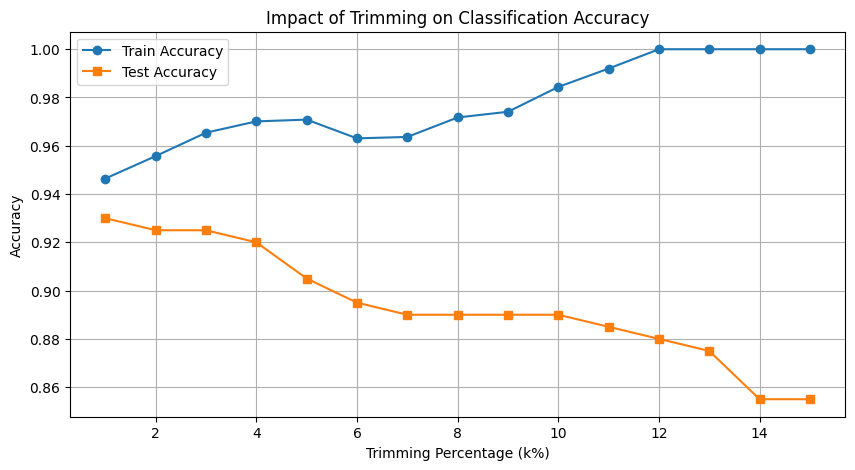

In [ ]:
female_train_with_outliers = np.copy(female_train)

trim_percentages = np.arange(1, 16) 
train_accuracies = []
test_accuracies = []

for k in trim_percentages:

    lower_bound = np.percentile(female_train_with_outliers, k)  
    upper_bound = np.percentile(female_train_with_outliers, 100 - k)  

    female_train_trimmed = female_train_with_outliers[(female_train_with_outliers >= lower_bound) & (female_train_with_outliers <= upper_bound)]
    female_mean_trimmed, female_std_trimmed = np.mean(female_train_trimmed), np.std(female_train_trimmed)

    female_train_predictions_trimmed = np.array([classify(h, male_mean, male_std, female_mean_trimmed, female_std_trimmed) for h in female_train_trimmed])

    female_test_predictions_trimmed = np.array([classify(h, male_mean, male_std, female_mean_trimmed, female_std_trimmed) for h in female_test])

    female_train_accuracy_trimmed = np.mean(female_train_predictions_trimmed == np.zeros(len(female_train_trimmed)))

    female_test_accuracy_trimmed = np.mean(female_test_predictions_trimmed == np.zeros(len(female_test)))

    train_accuracies.append(female_train_accuracy_trimmed)
    test_accuracies.append(female_test_accuracy_trimmed)

    # Print progress
    print(f"Trim {k}%: Train Accuracy = {female_train_accuracy_trimmed:.4f}, Test Accuracy = {female_test_accuracy_trimmed:.4f}")

# Summary of trimming impact
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(trim_percentages, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(trim_percentages, test_accuracies, label="Test Accuracy", marker="s")
plt.xlabel("Trimming Percentage (k%)")
plt.ylabel("Accuracy")
plt.title("Impact of Trimming on Classification Accuracy")
plt.legend()
plt.grid()
plt.show()


### Observation:  
- There is a steady increase in train accuracy with 100% accuracy after 12% trimming.
- By removing more and more data from tails, remaining data becomes smaller and homogenous leading to very high accuracy.
- There is a steady decrease in testing accuracy with 85.5% lowest recorded at 14% and 15% 
- The test set still follows original distribution having natural variability and hence, they are not aligning with trimmed training data that is getting tighter so leading to decrease in accuracy. 
- Essentially, excessive trimming overfits the model to a smaller, cleaner portion of the data. This raises training accuracy but hurts generalization, causing test accuracy to drop.